<a href="https://colab.research.google.com/github/koojahyeok/pytorch_study/blob/main/cifar_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100%|██████████| 170498071/170498071 [00:10<00:00, 15566298.31it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [12]:
trainloader

In [13]:
len(trainloader)

12500

In [3]:
trainset[0]

(tensor([[[-0.5373, -0.6627, -0.6078,  ...,  0.2392,  0.1922,  0.1608],
          [-0.8745, -1.0000, -0.8588,  ..., -0.0353, -0.0667, -0.0431],
          [-0.8039, -0.8745, -0.6157,  ..., -0.0745, -0.0588, -0.1451],
          ...,
          [ 0.6314,  0.5765,  0.5529,  ...,  0.2549, -0.5608, -0.5843],
          [ 0.4118,  0.3569,  0.4588,  ...,  0.4431, -0.2392, -0.3490],
          [ 0.3882,  0.3176,  0.4039,  ...,  0.6941,  0.1843, -0.0353]],
 
         [[-0.5137, -0.6392, -0.6235,  ...,  0.0353, -0.0196, -0.0275],
          [-0.8431, -1.0000, -0.9373,  ..., -0.3098, -0.3490, -0.3176],
          [-0.8118, -0.9451, -0.7882,  ..., -0.3412, -0.3412, -0.4275],
          ...,
          [ 0.3333,  0.2000,  0.2627,  ...,  0.0431, -0.7569, -0.7333],
          [ 0.0902, -0.0353,  0.1294,  ...,  0.1608, -0.5137, -0.5843],
          [ 0.1294,  0.0118,  0.1137,  ...,  0.4431, -0.0745, -0.2784]],
 
         [[-0.5059, -0.6471, -0.6627,  ..., -0.1529, -0.2000, -0.1922],
          [-0.8431, -1.0000,

In [4]:
len(trainset)

50000

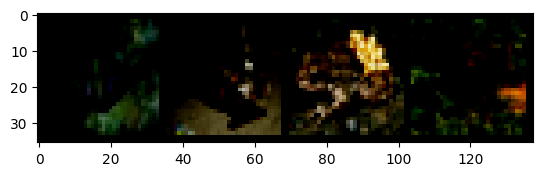

plane cat   frog  deer 


In [6]:
import matplotlib.pyplot as plt
import numpy as np

#이미지를 보여주기 위한 함수
def imshow(img):
    imp = img/2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

#학습용 이미지를 무작위로 가져오기
dataiter = iter(trainloader)
images, labels = next(dataiter)

#이미지 보여주기
imshow(torchvision.utils.make_grid(images))
#정답(label) 출력
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [10]:
#CNN 정의하기
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) #배치를 제외한 모든 차원을 평탄화
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

In [11]:
#손실함수와 optimizer 정의하기
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum = 0.9)

In [18]:
#신경망 학습하기
for epoch in range(2):

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        #[inputs, labels]의 목록인 data로붙터 입력받기
        inputs, labels = data

        #gradient 매개변수를 0으로 만들기
        optimizer.zero_grad()

        #순전파 + 역전파 + 최적화
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        #통계출력
        running_loss += loss.item()
        if i % 2000 == 1999:    #print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] ;loss: {running_loss/2000:.3f}')
            running_loss = 0

print('Finished Training')

[1,  2000] ;loss: 2.171
[1,  4000] ;loss: 1.903
[1,  6000] ;loss: 1.682
[1,  8000] ;loss: 1.576
[1, 10000] ;loss: 1.508
[1, 12000] ;loss: 1.440
[2,  2000] ;loss: 1.370
[2,  4000] ;loss: 1.357
[2,  6000] ;loss: 1.332
[2,  8000] ;loss: 1.289
[2, 10000] ;loss: 1.284
[2, 12000] ;loss: 1.252
Finished Training


In [19]:
#학습한 모델 저장
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

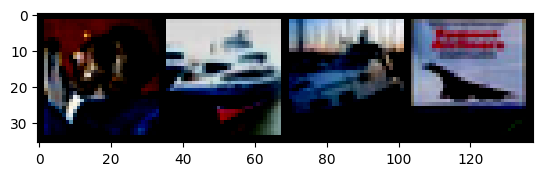

GroundTruth:  cat  ship ship plane


In [21]:
#시험용 데이터로 신경망 검사하기
dataiter = iter(testloader)
images, labels = next(dataiter)

#이미지 출력
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ''.join(f'{classes[labels[j]]:5s}'for j in range(4)))

In [22]:
#저장했던 모델 불러오기
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [23]:
outputs = net(images)

In [24]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}' for j in range(4)))

Predicted:  cat   ship  ship  ship 


In [25]:
#전체 데이터셋에 대해 확인
correct = 0
total = 0
#학습 중이 아니므로, 출력에 대한 변화도를 계산할 필요 ㅌ
with torch.no_grad():
    for data in testloader:
        images, labels = data

        outputs = net(images)

        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total}%')

Accuracy of the network on the 10000 test images: 55%


In [26]:
#어떤 class를 잘 분류하고 어떤걸 잘 못 분류했는지 확인
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

#변화도는 여전히 필요하지 않음
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        #각 분류별 올바른 예측 모으기
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1

#각 분류별 정확도 출력
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f}%')

Accuracy for class: plane is 60.4%
Accuracy for class: car   is 67.8%
Accuracy for class: bird  is 38.3%
Accuracy for class: cat   is 35.7%
Accuracy for class: deer  is 52.4%
Accuracy for class: dog   is 38.1%
Accuracy for class: frog  is 70.7%
Accuracy for class: horse is 53.8%
Accuracy for class: ship  is 69.6%
Accuracy for class: truck is 72.8%
